Pruebas de distintos Gemelos Digitales
https://python.plainenglish.io/material-flow-simulation-and-optimization-with-simpy-8c3abf48cc21


In [ ]:
#Gemelo digital ejemplos
!pip install simpy
import simpy

# Definir la función del proceso de producción
def proceso_produccion(env, nombre_maquina):
    while True:
        # Simular el proceso de producción
        print(f'Máquina {nombre_maquina}: Produciendo producto')
        yield env.timeout(1)  # Simular el tiempo que tarda en producir un producto

# Crear el entorno de simulación
env = simpy.Environment()

# Agregar máquinas al entorno de simulación
maquina1 = env.process(proceso_produccion(env, 'Máquina 1'))
maquina2 = env.process(proceso_produccion(env, 'Máquina 2'))

# Ejecutar la simulación por un cierto número de unidades de tiempo
env.run(until=10)  # Simular la producción durante 10 unidades de tiempo


Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto
Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto
Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto
Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto
Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto
Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto
Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto
Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto
Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto
Máquina Máquina 1: Produciendo producto
Máquina Máquina 2: Produciendo producto


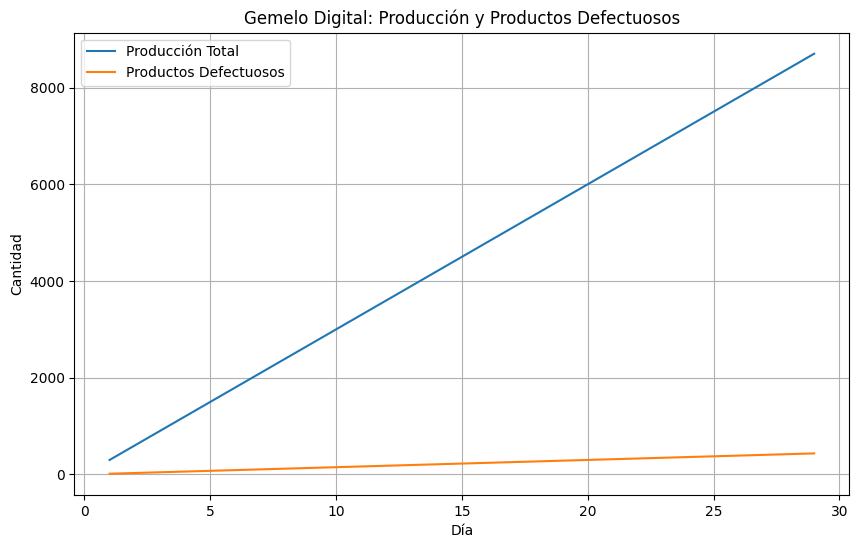

In [ ]:
#!pip install simpy

import simpy
import matplotlib.pyplot as plt

# Parámetros de la simulación
num_equipos = 3
dias_simulacion = 30
productos_generados_diarios = 100
productos_defectuosos_diarios = 5

# Función de la planta de producción
def planta_produccion(env, num_equipos, productos_generados_diarios, productos_defectuosos_diarios):
    produccion_total = 0
    productos_defectuosos_total = 0

    for dia in range(1, dias_simulacion + 1):
        produccion_dia = productos_generados_diarios * num_equipos
        productos_defectuosos_dia = productos_defectuosos_diarios * num_equipos

        produccion_total += produccion_dia
        productos_defectuosos_total += productos_defectuosos_dia

        # Simular el proceso de producción para un día
        yield env.timeout(1)  # Simular un día

        # Guardar datos para visualización
        produccion_total_data.append(produccion_total)
        productos_defectuosos_data.append(productos_defectuosos_total)

# Crear el entorno de simulación
env = simpy.Environment()

# Listas para almacenar los datos de producción y productos defectuosos
produccion_total_data = []
productos_defectuosos_data = []

# Iniciar la simulación
env.process(planta_produccion(env, num_equipos, productos_generados_diarios, productos_defectuosos_diarios))
env.run(until=dias_simulacion)

# Crear un gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, dias_simulacion), produccion_total_data, label='Producción Total')
plt.plot(range(1, dias_simulacion), productos_defectuosos_data, label='Productos Defectuosos')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.title('Gemelo Digital: Producción y Productos Defectuosos')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import simpy
import random

# Clase para representar una máquina
class Maquina:
    def __init__(self, env, nombre, tiempo_proceso):
        self.env = env
        self.nombre = nombre
        self.tiempo_proceso = tiempo_proceso
        self.proceso = env.process(self.trabajar())

    # Método para simular el trabajo de la máquina
    def trabajar(self):
        while True:
            print(f'Tiempo {self.env.now}: {self.nombre} está procesando un producto')
            yield self.env.timeout(self.tiempo_proceso)  # Simular el tiempo de procesamiento

# Función de simulación
def simulacion(env, num_maquinas, tiempos_proceso):
    maquinas = []
    for i in range(num_maquinas):
        maquina = Maquina(env, f'Máquina {i + 1}', tiempos_proceso[i])
        maquinas.append(maquina)

    # Simular durante un cierto tiempo
    yield env.timeout(10)  # Simular durante 10 unidades de tiempo

# Configuración de la simulación
num_maquinas = 3
tiempos_proceso = [random.uniform(1, 5) for _ in range(num_maquinas)]  # Tiempos de proceso aleatorios

# Iniciar la simulación
env = simpy.Environment()
env.process(simulacion(env, num_maquinas, tiempos_proceso))
env.run(until=30)


Tiempo 0: Máquina 1 está procesando un producto
Tiempo 0: Máquina 2 está procesando un producto
Tiempo 0: Máquina 3 está procesando un producto
Tiempo 1.715609166744036: Máquina 3 está procesando un producto
Tiempo 2.4239594588028983: Máquina 1 está procesando un producto
Tiempo 3.431218333488072: Máquina 3 está procesando un producto
Tiempo 4.675368321357903: Máquina 2 está procesando un producto
Tiempo 4.847918917605797: Máquina 1 está procesando un producto
Tiempo 5.146827500232108: Máquina 3 está procesando un producto
Tiempo 6.862436666976144: Máquina 3 está procesando un producto
Tiempo 7.271878376408695: Máquina 1 está procesando un producto
Tiempo 8.57804583372018: Máquina 3 está procesando un producto
Tiempo 9.350736642715805: Máquina 2 está procesando un producto
Tiempo 9.695837835211593: Máquina 1 está procesando un producto
Tiempo 10.293655000464216: Máquina 3 está procesando un producto
Tiempo 12.009264167208253: Máquina 3 está procesando un producto
Tiempo 12.119797294014


Ejemplo Carwahs: https://simpy.readthedocs.io/en/latest/examples/carwash.html

In [ ]:
"""
Carwash example.

Covers:

- Waiting for other processes
- Resources: Resource

Scenario:
  A carwash has a limited number of washing machines and defines
  a washing processes that takes some (random) time.

  Car processes arrive at the carwash at a random time. If one washing
  machine is available, they start the washing process and wait for it
  to finish. If not, they wait until they can use one.

"""
import random

import simpy


RANDOM_SEED = 42
NUM_MACHINES = 2  # Number of machines in the carwash
WASHTIME = 5      # Minutes it takes to clean a car
T_INTER = 7       # Create a car every ~7 minutes
SIM_TIME = 20     # Simulation time in minutes


class Carwash(object):
    """A carwash has a limited number of machines (``NUM_MACHINES``) to
    clean cars in parallel.

    Cars have to request one of the machines. When they got one, they
    can start the washing processes and wait for it to finish (which
    takes ``washtime`` minutes).

    """
    def __init__(self, env, num_machines, washtime):
        self.env = env
        self.machine = simpy.Resource(env, num_machines)
        self.washtime = washtime

    def wash(self, car):
        """The washing processes. It takes a ``car`` processes and tries
        to clean it."""
        yield self.env.timeout(self.washtime)
        print("Carwash removed %d%% of %s's dirt." %
              (random.randint(50, 99), car))


def car(env, name, cw):
    """The car process (each car has a ``name``) arrives at the carwash
    (``cw``) and requests a cleaning machine.

    It then starts the washing process, waits for it to finish and
    leaves to never come back ...

    """
    print('%s arrives at the carwash at %.2f.' % (name, env.now))
    with cw.machine.request() as request:
        yield request

        print('%s enters the carwash at %.2f.' % (name, env.now))
        yield env.process(cw.wash(name))

        print('%s leaves the carwash at %.2f.' % (name, env.now))


def setup(env, num_machines, washtime, t_inter):
    """Create a carwash, a number of initial cars and keep creating cars
    approx. every ``t_inter`` minutes."""
    # Create the carwash
    carwash = Carwash(env, num_machines, washtime)

    # Create 4 initial cars
    for i in range(4):
        env.process(car(env, 'Car %d' % i, carwash))

    # Create more cars while the simulation is running
    while True:
        yield env.timeout(random.randint(t_inter - 2, t_inter + 2))
        i += 1
        env.process(car(env, 'Car %d' % i, carwash))


# Setup and start the simulation
print('Carwash')
print('Check out http://youtu.be/fXXmeP9TvBg while simulating ... ;-)')
random.seed(RANDOM_SEED)  # This helps to reproduce the results

# Create an environment and start the setup process
env = simpy.Environment()
env.process(setup(env, NUM_MACHINES, WASHTIME, T_INTER))

# Execute!
env.run(until=SIM_TIME)

Carwash
Check out http://youtu.be/fXXmeP9TvBg while simulating ... ;-)
Car 0 arrives at the carwash at 0.00.
Car 1 arrives at the carwash at 0.00.
Car 2 arrives at the carwash at 0.00.
Car 3 arrives at the carwash at 0.00.
Car 0 enters the carwash at 0.00.
Car 1 enters the carwash at 0.00.
Car 4 arrives at the carwash at 5.00.
Carwash removed 97% of Car 0's dirt.
Carwash removed 67% of Car 1's dirt.
Car 0 leaves the carwash at 5.00.
Car 1 leaves the carwash at 5.00.
Car 2 enters the carwash at 5.00.
Car 3 enters the carwash at 5.00.
Car 5 arrives at the carwash at 10.00.
Carwash removed 64% of Car 2's dirt.
Carwash removed 58% of Car 3's dirt.
Car 2 leaves the carwash at 10.00.
Car 3 leaves the carwash at 10.00.
Car 4 enters the carwash at 10.00.
Car 5 enters the carwash at 10.00.
Carwash removed 97% of Car 4's dirt.
Carwash removed 56% of Car 5's dirt.
Car 4 leaves the carwash at 15.00.
Car 5 leaves the carwash at 15.00.
Car 6 arrives at the carwash at 16.00.
Car 6 enters the carwash 

Simulación y Optimización
https://python.plainenglish.io/material-flow-simulation-and-optimization-with-simpy-8c3abf48cc21

In [ ]:
!pip install rbfopt

import simpy
import numpy as np
import rbfopt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
class Factory:
    def __init__(
            self,
            env:simpy.Environment,
            num_stages:int,
            machine_times:list[float],
            n_machines:list[int]
            ) -> None:
        self.env = env

        self.machines = [simpy.Resource(env, n_machines[i])
            for i in range(num_stages)]

        self.machine_times = machine_times
        self.n_machines = n_machines
        self.num_stages = num_stages

    def produce(self, m_id):
        rt = np.random.exponential(scale=1.0/self.machine_times[m_id])
        print("production time: ", rt, m_id)
        yield self.env.timeout(rt)

In [ ]:
def manufacture(env:simpy.Environment, product_id:int, processor:Factory, data:list):

    for i in range(processor.num_stages):
        with processor.machines[i].request() as request:
            # yield can also be seen as a 'wait for' statement
            # wait for the machine to be ready
            yield request
            # wait for the factory to process the product
            yield env.process(processor.produce(i))
        print(f"product id {product_id} finished processing stage {i} at {env.now}")
    data.append([product_id, env.now])

In [ ]:
def setup(env:simpy.Environment, num_stages, num_machines, machine_times, delivery_interval:float, data:list):
    factory = Factory(env, num_stages,machine_times, num_machines)
    i = 0
    while True:
        # wait for the next product to be delivered
        yield env.timeout(np.random.exponential(1.0/delivery_interval))
        i = i + 1
        print(f"product {i} delivered at {env.now}")
        # if a new product is delivered, launch a new process that handles this product.
        env.process(manufacture(env, i, factory, data))

In [ ]:
NUM_MACHINES = [3, 5]
MACHINE_TIMES = [0.1,0.2]

DELIVERY_RATE = 1
MACHINE_COSTS = [300,200]
SIM_TIME = 120

def run(num_machines):
    data = []
    env = simpy.Environment()
    env.process(setup(env, len(num_machines), num_machines, MACHINE_TIMES, DELIVERY_RATE, data))
    env.run(until=SIM_TIME)
    return len(data)

In [ ]:
run(NUM_MACHINES)

product 1 delivered at 2.3891879445514577
production time:  32.2305863809211 0
product 2 delivered at 9.047756805072284
production time:  2.427074200696567 0
product 3 delivered at 10.80367792701714
production time:  6.556178475380698 0
product 4 delivered at 10.8442340103292
product id 2 finished processing stage 0 at 11.474831005768852
production time:  14.102568868079434 1
production time:  6.413540474445462 0
product 5 delivered at 12.237589256827132
product 6 delivered at 13.12614609197104
product 7 delivered at 13.45647614957253
product 8 delivered at 14.0167997295409
product 9 delivered at 14.73918935639668
product 10 delivered at 14.969673714782564
product 11 delivered at 15.159846599622494
product 12 delivered at 17.1194000140858
product id 3 finished processing stage 0 at 17.35985640239784
production time:  5.971142998759929 1
production time:  6.454757697373284 0
product 13 delivered at 17.503053152186038
product id 4 finished processing stage 0 at 17.888371480214314
product

24

In [ ]:
def price(supply):
    demand = 50
    return 100 - demand

In [ ]:
def obj(num_machines):
    products_handled = run(num_machines)
    return -(
        products_handled * price(products_handled)
        - sum([MACHINE_COSTS[i]*num_machines[i] for i in range(len(num_machines))]))

In [ ]:
NDIM = 2
max_fun_calls = 8
lbounds = [1,1]
ubounds = [10, 10]

bb = rbfopt.RbfoptUserBlackBox(
    dimension=NDIM,
    var_lower=np.array(lbounds, dtype=np.float),
    var_upper=np.array(ubounds, dtype=np.float),
    var_type=['N'] * NDIM, obj_funct=obj)

settings = rbfopt.RbfoptSettings(max_evaluations=max_fun_calls)

alg = rbfopt.RbfoptAlgorithm(settings, bb)

fval, sol, iter_count, eval_count, fast_eval_count = alg.optimize()

  Iter  Cycle  Action             Objective value      Time      Gap
  ----  -----  ------             ---------------      ----      ---
product 1 delivered at 0.7132205587768918
production time:  21.42211389989879 0
product 2 delivered at 2.499945371475112
production time:  1.5445748887045816 0
product id 2 finished processing stage 0 at 4.044520260179693
production time:  8.802146024361894 1
product 3 delivered at 4.375735132696708
production time:  6.7827577065756 0
product 4 delivered at 7.03290239205189
production time:  3.2498993185683873 0
product 5 delivered at 7.310164097575558
production time:  2.8144521157309614 0
product 6 delivered at 9.185723862646812
production time:  0.37010336574373814 0
product id 6 finished processing stage 0 at 9.55582722839055
production time:  2.2170720921810614 1
product 7 delivered at 9.817701258433726
production time:  4.83870034155429 0
product id 5 finished processing stage 0 at 10.124616213306519
production time:  0.695538595239681 1
produc

<ipython-input-43-c4a708776394>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  var_lower=np.array(lbounds, dtype=np.float),
<ipython-input-43-c4a708776394>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  var_upper=np.array(ubounds, dtype=np.float),


product 1 delivered at 3.118101939253701
production time:  12.350186219208897 0
product 2 delivered at 3.8527201297524805
product 3 delivered at 4.67611300521018
product 4 delivered at 6.768816825478909
product 5 delivered at 7.027519701272315
product 6 delivered at 7.373077926391826
product 7 delivered at 7.4475938523059035
product 8 delivered at 8.379423320642228
product 9 delivered at 8.502406160238861
product 10 delivered at 9.325845471458704
product 11 delivered at 9.509011501437802
product 12 delivered at 9.690671144805664
product 13 delivered at 10.860579868222596
product 14 delivered at 11.905341972191914
product 15 delivered at 13.311906756704449
product 16 delivered at 13.32772091170271
product 17 delivered at 13.855209145585974
product 18 delivered at 14.142547787107468
product id 1 finished processing stage 0 at 15.468288158462599
production time:  1.935353094811141 1
production time:  3.0398096480810044 0
product 19 delivered at 16.168028035745607
product 20 delivered at 1

In [ ]:
print(fval)
print(sol)

-900.0
[7. 6.]


In [ ]:
z = np.zeros((5,5))
x = np.arange(0,5)
y = np.arange(0,5)

x, y = np.meshgrid(x, y)

for i in range(1, 5):
    for j in range(1,5):
        z[i, j] = -sum([obj([i,j]) for _ in range(50)])/50

Se han truncado las últimas 5000 líneas del flujo de salida.
product 10 delivered at 10.412016395037005
product 11 delivered at 10.454888269397863
product 12 delivered at 11.774726780472983
product 13 delivered at 11.965478565719057
product 14 delivered at 13.973343352795109
product 15 delivered at 16.789905106047396
product 16 delivered at 17.202233584090493
product id 1 finished processing stage 0 at 20.093545477656342
production time:  3.6743568661370403 1
production time:  5.362319930542822 0
product 17 delivered at 22.618330898999382
product 18 delivered at 22.80531944298669
product 19 delivered at 23.171044485478284
product id 1 finished processing stage 1 at 23.76790234379338
product id 2 finished processing stage 0 at 25.455865408199163
production time:  2.407957425690117 1
production time:  1.2027993027966262 0
product 20 delivered at 26.248690483258482
product id 3 finished processing stage 0 at 26.65866471099579
production time:  0.4254199990874121 1
production time:  11.713

IndexError: ignored

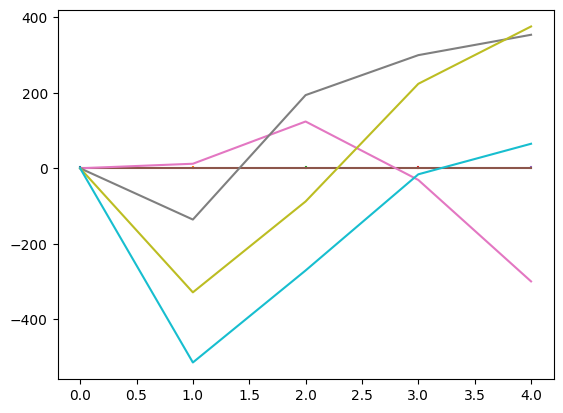

In [ ]:
plt.plot(x,y,z)

In [ ]:
#Ya hemos hecho un digital twin de simulación con tiempos teóricos, pero, y si tenemos datos reales.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Mpredictivo.csv')

In [ ]:
df.columns
display(df)

,Machine_ID,Failure,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,...,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Sensor_22,Sensor_23,Sensor_24,Sensor_25
0,M_0001,no,2.633145,0.917772,4.228583,13.792282,23.402873,13.764430,6.054069,1.642476,...,0.557999,2.494481,0.989780,2.025648,1.884942,3.081145,1.144580,2.048890,2.795157,2.266394
1,M_0002,yes,9.244154,22.732304,15.306646,8.553371,5.707128,2.998785,1.427912,1.361257,...,0.416257,0.279726,0.518396,0.783738,0.808525,1.228421,0.735345,2.599106,2.778646,2.779984
2,M_0003,no,3.183117,28.525667,8.735421,4.898447,3.684913,2.960171,2.398280,1.938302,...,1.537869,1.398911,1.308508,1.261598,1.215973,1.022607,0.893002,0.213232,0.138608,0.098692
3,M_0004,yes,2.784999,2.641999,5.856832,7.417146,24.343165,16.182540,4.875868,2.390343,...,0.833330,0.667510,1.453712,1.161611,1.371168,1.094430,0.763502,0.427209,0.188182,0.095695
4,M_0005,yes,4.888670,14.414701,23.903175,12.985241,5.865225,3.779588,2.588059,1.723276,...,0.279197,0.130920,0.662643,1.133983,0.944060,1.756196,2.199622,2.984138,3.017337,3.109916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,M_0132,no,2.124967,1.528383,1.427524,5.536391,31.029292,5.256343,2.008043,0.938903,...,1.840645,2.371996,1.841772,1.764215,1.831539,1.889264,1.717098,2.815797,2.679367,2.786401
132,M_0133,no,2.024489,3.596282,6.568539,30.123134,8.161426,2.609366,0.768163,1.156638,...,0.105205,2.373003,2.134059,0.971282,0.130932,1.318455,1.608251,0.792427,0.176711,0.272135
133,M_0134,no,1.467855,1.235773,2.596727,5.109773,31.230442,4.242996,2.131259,1.321937,...,0.911744,0.813474,1.428779,1.332921,0.933054,1.860113,3.093713,0.021262,1.421810,1.270372
134,M_0135,no,4.384960,5.287841,9.164953,12.204799,9.886671,23.061174,9.547819,1.048536,...,2.160655,2.236247,2.016683,0.710863,3.100437,3.044590,2.839006,2.993265,2.641387,2.677650


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Failure', 'Machine_ID'])
y = df['Failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()


In [ ]:
modelo.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

predicciones = modelo.predict(X_test_scaled)
exactitud = accuracy_score(y_test, predicciones)
print(f'Exactitud del modelo: {exactitud}')
print(classification_report(y_test, predicciones))


Exactitud del modelo: 0.75
              precision    recall  f1-score   support

          no       0.71      0.86      0.77        14
         yes       0.82      0.64      0.72        14

    accuracy                           0.75        28
   macro avg       0.76      0.75      0.75        28
weighted avg       0.76      0.75      0.75        28



In [ ]:
coeficientes = modelo.coef_
display(coeficientes[0])
display(X.columns)

array([ 0.04114121, -0.15515242,  0.30180874,  0.59606006,  0.64257574,
       -0.2214922 ,  1.16668796,  0.17035096,  0.0863605 , -0.48929251,
        0.16889771, -0.09274903, -0.15325084,  0.26480055, -0.20913812,
        0.3012208 , -0.24649423,  0.19217498, -0.01834407,  0.21976816,
       -0.58596755, -0.18290562,  0.28381321,  0.46489048, -0.43202001])

Index(['Sensor_1', 'Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_5', 'Sensor_6',
       'Sensor_7', 'Sensor_8', 'Sensor_9', 'Sensor_10', 'Sensor_11',
       'Sensor_12', 'Sensor_13', 'Sensor_14', 'Sensor_15', 'Sensor_16',
       'Sensor_17', 'Sensor_18', 'Sensor_19', 'Sensor_20', 'Sensor_21',
       'Sensor_22', 'Sensor_23', 'Sensor_24', 'Sensor_25'],
      dtype='object')

<BarContainer object of 25 artists>

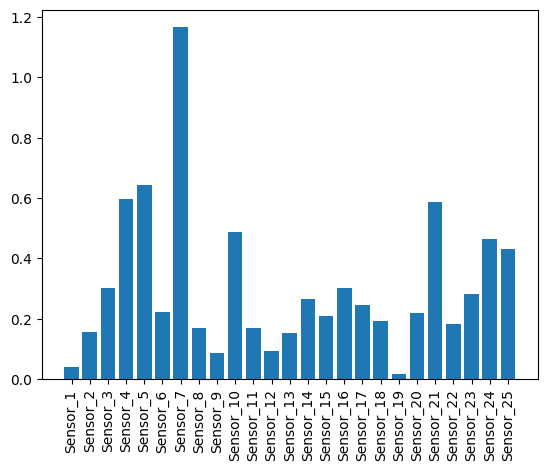

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xticks(rotation=90)
plt.bar(X.columns, abs(coeficientes[0]))



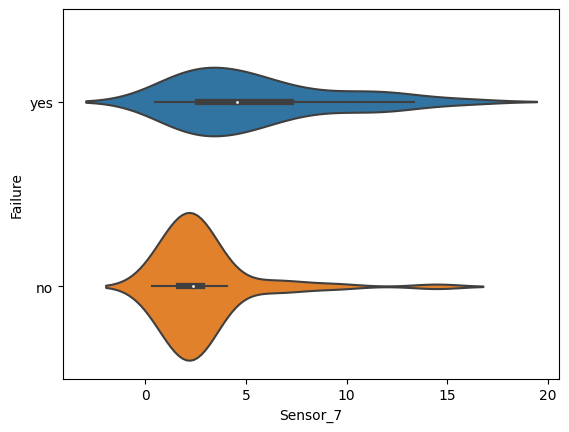

In [ ]:
# Suponiendo que tienes un DataFrame llamado 'datos' con columnas predictoras ('X1', 'X2', etc.) y la variable de respuesta ('y')
sns.violinplot(x=X_train['Sensor_7'], y=y_train, data=df)
plt.show()

In [ ]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado 'datos' con columnas de sensores
correlaciones = df.corr()
print(correlaciones)

           Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  Sensor_6  \
Sensor_1   1.000000  0.672930  0.345525 -0.142864 -0.392908 -0.210788   
Sensor_2   0.672930  1.000000  0.361686 -0.346625 -0.524183 -0.382351   
Sensor_3   0.345525  0.361686  1.000000 -0.217420 -0.647803 -0.471861   
Sensor_4  -0.142864 -0.346625 -0.217420  1.000000 -0.159211 -0.125495   
Sensor_5  -0.392908 -0.524183 -0.647803 -0.159211  1.000000  0.408087   
Sensor_6  -0.210788 -0.382351 -0.471861 -0.125495  0.408087  1.000000   
Sensor_7  -0.218192 -0.304110 -0.374176 -0.120688  0.262668  0.744922   
Sensor_8  -0.177111 -0.226177 -0.278554 -0.087224  0.149339  0.581485   
Sensor_9  -0.148906 -0.227195 -0.303715  0.009719  0.180611  0.461749   
Sensor_10 -0.120530 -0.200474 -0.248250  0.015534  0.158108  0.431106   
Sensor_11 -0.124222 -0.183893 -0.231079 -0.002890  0.199557  0.521010   
Sensor_12 -0.077370 -0.117230 -0.154723  0.032696  0.096622  0.540396   
Sensor_13  0.001256 -0.013755 -0.033898 -0.011336  

<ipython-input-18-b60ddfbcc60d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df.corr()


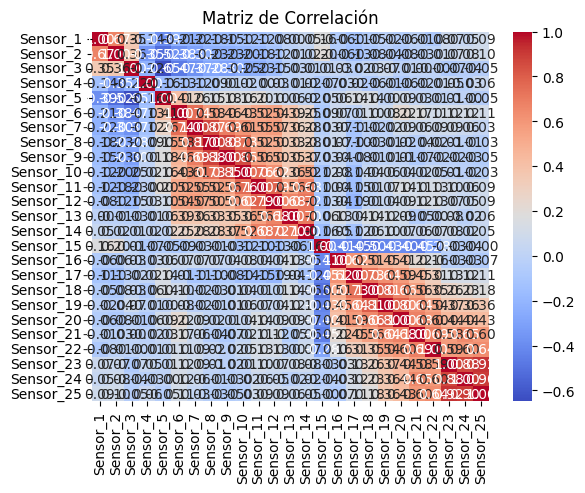

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un heatmap de las correlaciones
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [ ]:
sensores = X_train.columns
print(sensores[0])

Sensor_1


In [ ]:
def itera_por_matriz():
  for sensor1 in sensores:
    for sensor2 in sensores:
        if sensor1 != sensor2:
          correlacion_entre_variables = correlaciones.loc[sensor1, sensor2]
          yield [sensor1, sensor2, correlacion_entre_variables]
          #print(f"Correlación entre {sensor1} y {sensor2}: {correlacion_entre_variables}")

pares = pd.DataFrame(itera_por_matriz())
display(pares)

,0,1,2
0,Sensor_1,Sensor_2,0.672930
1,Sensor_1,Sensor_3,0.345525
2,Sensor_1,Sensor_4,-0.142864
3,Sensor_1,Sensor_5,-0.392908
4,Sensor_1,Sensor_6,-0.210788
...,...,...,...
595,Sensor_25,Sensor_20,0.430821
596,Sensor_25,Sensor_21,0.598032
597,Sensor_25,Sensor_22,0.638904
598,Sensor_25,Sensor_23,0.920509


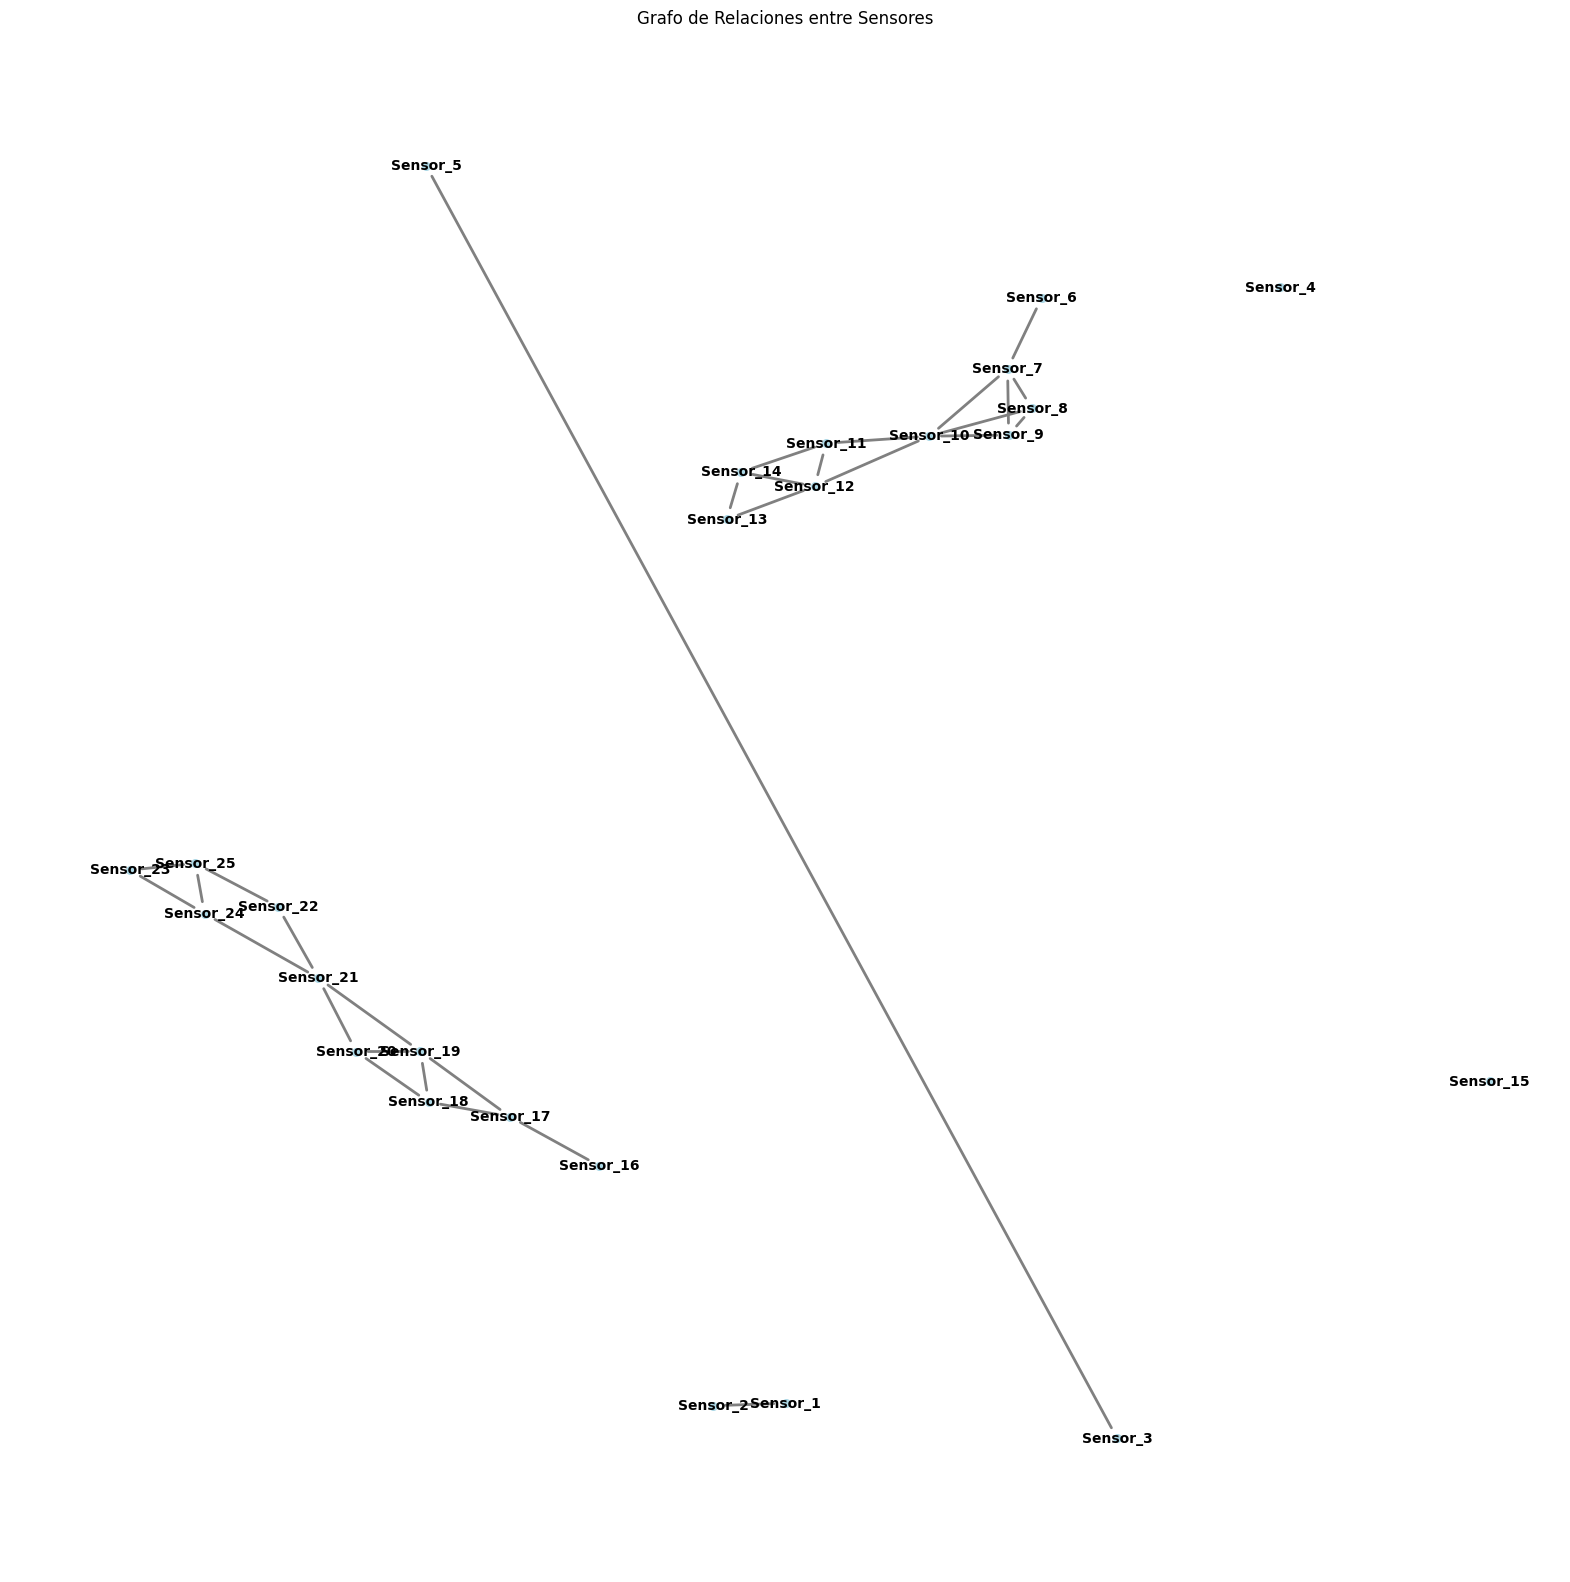

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

datos = X_train
umbral = 0.6

# Crear un grafo vacío
grafo = nx.Graph()

# Agregar nodos (sensores) al grafo
sensores = datos.columns
grafo.add_nodes_from(sensores)

# Agregar relaciones (aristas) basadas en las correlaciones
for sensor1 in sensores:
    for sensor2 in sensores:
        if sensor1 != sensor2:
            correlacion = correlaciones.loc[sensor1, sensor2]
            if abs(correlacion) > umbral:  # Define un umbral para agregar la relación
                grafo.add_edge(sensor1, sensor2, weight=correlacion)

# Visualizar el grafo
plt.figure(figsize=(20, 20))


pos = nx.spring_layout(grafo)  # Definir un diseño para el grafo
#nx.draw(grafo, pos, with_labels=False, font_weight='bold', node_color='lightblue', node_size=50, width=2, edge_color='gray', arrows=True)

# Dibujar nodos
nx.draw_networkx_nodes(grafo, pos, node_color='lightblue', node_size=30)  # Aumenta el tamaño de los nodos
# Dibujar aristas con etiquetas de peso
nx.draw_networkx_edges(grafo, pos, edge_color='gray', width=2, arrows=True)

# Dibujar etiquetas de nodos
nx.draw_networkx_labels(grafo,pos,font_size=10,font_weight = 700,font_family='sans-serif')

labels = nx.get_edge_attributes(grafo, 'weight')
#nx.draw_networkx_edge_labels(grafo, pos, edge_labels=labels, font_family='sans-serif')


# Mostrar el grafo
plt.title("Grafo de Relaciones entre Sensores")
plt.axis('off')  # Ocultar ejes
plt.show()



#Con computación Cuántica
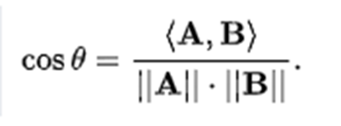

Producto interno en cuántica: Sistema Físico en el que podemos almacenar datos reales en Amplitud o en Fase.
Entrelazamiento: Correlación entre Qubits.
Base de la comparativa entre datos en el entrenamiento y labels en RNAs cuánticas.
El entrelazamiento parte de una superposición de estados, y un CNOT.
El producto interno, (similitud coseno), viene dada por el Test de Swap, que es generar un entrelazamiento de estados masivo, aplicado con un kickback.
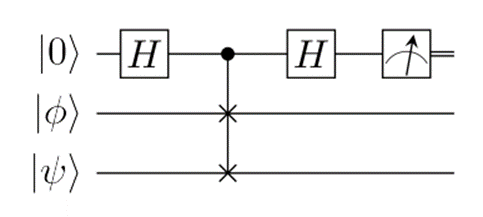

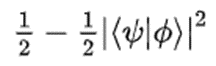

Símplemente con la Inicizalización y una puerta Hadamard

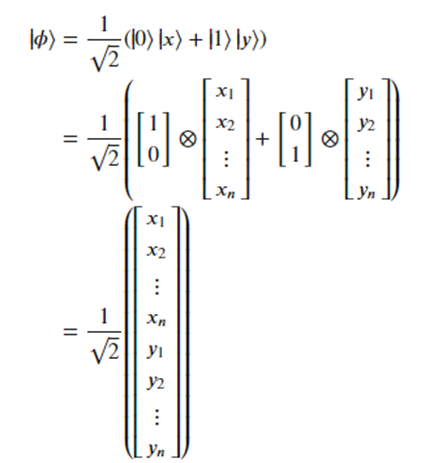

Le añadimos una puerta Hadamard al final, (el último qubit en el circuito de Qiskit, es el qubit más a la izquierda en la fórmula, es decir, el |0>), nos queda:

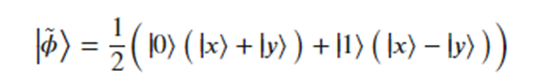


Si calculamos la probabilidad de P(0):

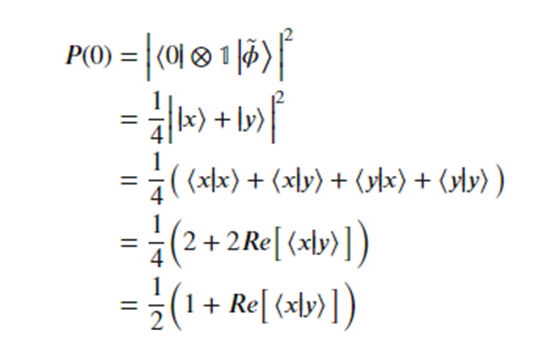

Es decir, podemos cálcular el producto interno como:

 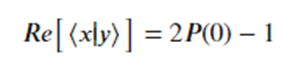


Aplicasos la correlación cuántica

In [ ]:
!pip install qiskit
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 14.7 MB/s eta 0:00:00


In [ ]:
#Queremos evaluar colummnas, no filas
#Tomamos de ejemplo el sensro1 y el sensor2
from qiskit.quantum_info import Statevector


import math
x = X_train['Sensor_1'].head(64)
y = X_train['Sensor_2'].head(64)

N = len(x)
print(N)
nqubits = math.ceil(np.log2(N))    # compute how many qubits needed to encode either x or y

xnorm = np.linalg.norm(x)          # normalise vectors x and y
ynorm = np.linalg.norm(y)

x2 = x/xnorm
y2 = y/ynorm

circ = QuantumCircuit(nqubits+1)   # create circuit lo qubits de entrada + el qubit de ansatz
vec = np.concatenate((x2,y2))/np.sqrt(2)    # concatenate x and y as above, with renormalisation

print(vec)

circ.initialize(vec, range(nqubits+1))
circ.h(nqubits)                    # apply hadamard to bottom qubit

state = Statevector(circ)

circ.draw()                        # draw the circuit

64
[0.03517486 0.11765194 0.0672936  0.10214087 0.06240907 0.12266607
 0.06011446 0.06177085 0.03094566 0.0203764  0.0578045  0.0399031
 0.01182281 0.07781576 0.09872885 0.02587428 0.020227   0.08073326
 0.01921354 0.04199086 0.05621055 0.04512173 0.17564889 0.06672207
 0.00794787 0.04164427 0.04851282 0.02270697 0.11613912 0.1125414
 0.07937216 0.04346801 0.06790584 0.0626726  0.01790662 0.08902024
 0.12028577 0.19446976 0.00816452 0.05433372 0.05370114 0.15657174
 0.05912836 0.04066642 0.2566843  0.06156843 0.06377354 0.02217148
 0.23731634 0.07314955 0.01615093 0.06358128 0.06051622 0.08831499
 0.04419754 0.0575858  0.14186798 0.0380913  0.08725686 0.10225531
 0.13948328 0.0177653  0.10010826 0.03287988 0.03210152 0.06462681
 0.04587187 0.04864947 0.0277588  0.03779078 0.00828559 0.03588773
 0.02028286 0.02008543 0.03230458 0.00826545 0.0093841  0.04054319
 0.10776397 0.0150609  0.00957445 0.17990405 0.0098498  0.03362226
 0.02987424 0.0299933  0.14401475 0.0619625  0.01625141 0.022

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
q_6: »
     »
«     ┌───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ├»
«     │                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       │»
«q_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
circ.decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().draw()

┌────────────┐                                                     »
q_0: ─|0>───┤ Ry(1.5943) ├─────────────────────────────────────────────────────»
          ┌─┴────────────┴┐                                                    »
q_1: ─|0>─┤ R(1.2272,π/2) ├────────────────────────────────────────────────────»
          ├───────────────┴┐                                                   »
q_2: ─|0>─┤ U3(1.7426,0,0) ├───────────────────────────────────────────────────»
          ├───────────────┬┘                                                   »
q_3: ─|0>─┤ U(1.5103,0,0) ├────────────────────────────────────────────────────»
          ├───────────────┤                             ┌───┐┌────────────────┐»
q_4: ─|0>─┤ U(1.6879,0,0) ├─────────────────────────────┤ X ├┤ U(0.17053,0,0) ├»
          ├───────────────┤ ┌───┐┌────────────────┐┌───┐└─┬─┘└────────────────┘»
q_5: ─|0>─┤ U(2.0251,0,0) ├─┤ X ├┤ U(-0.1197,0,0) ├┤ X ├──■────────────────────»
          └─┬────────────┬┘ └─┬─┘└────────────────┘└─┬─┘                       »
q_6: ─|0>───┤ U(π/2,0,0) ├────■──────────────────────■─────────────────────────»
            └────────────┘                                                     »
«                                                               »
«q_0: ──────────────────────────────────────────────────────────»
«                                                               »
«q_1: ──────────────────────────────────────────────────────────»
«                                                               »
«q_2: ──────────────────────────────────────────────────────────»
«                                                          ┌───┐»
«q_3: ─────────────────────────────────────────────────────┤ X ├»
«     ┌───┐┌─────────────────┐┌───┐┌─────────────────┐┌───┐└─┬─┘»
«q_4: ┤ X ├┤ U(-0.10435,0,0) ├┤ X ├┤ U(-0.12821,0,0) ├┤ X ├──■──»
«     └─┬─┘└─────────────────┘└─┬─┘└─────────────────┘└─┬─┘     »
«q_5: ──┼───────────────────────■───────────────────────┼───────»
«       │                                               │       »
«q_6: ──■───────────────────────────────────────────────■───────»
«                                                               »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1: ────────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_2: ────────────────────────────────────────────────────────────────────────»
«     ┌────────────────┐┌───┐┌──────────────────┐┌───┐┌─────────────────┐┌───┐»
«q_3: ┤ U(0.10803,0,0) ├┤ X ├┤ U(-0.063303,0,0) ├┤ X ├┤ U(-0.16268,0,0) ├┤ X ├»
«     └────────────────┘└─┬─┘└──────────────────┘└─┬─┘└─────────────────┘└─┬─┘»
«q_4: ────────────────────┼────────────────────────■───────────────────────┼──»
«                         │                                                │  »
«q_5: ────────────────────■────────────────────────────────────────────────┼──»
«                                                                          │  »
«q_6: ─────────────────────────────────────────────────────────────────────■──»
«                                                                             »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«     ┌───────────────────┐┌───┐┌──────────────────┐┌───┐┌─────────────────┐»
«q_3: ┤ U(-0.0050343,0,0) ├┤ X ├┤ U(-0.084515,0,0) ├┤ X ├┤ U(

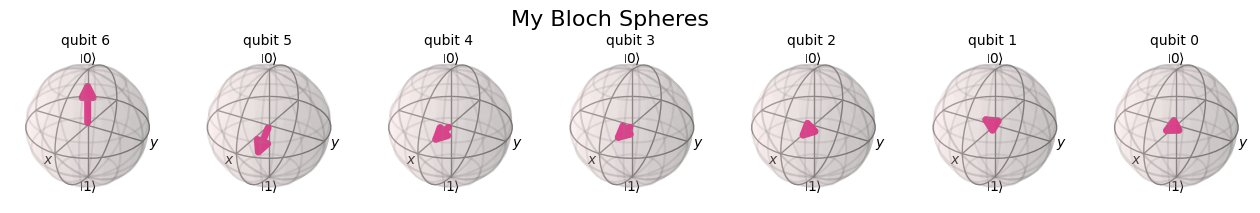

In [ ]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_qsphere

matrix = DensityMatrix(circ)
plot_bloch_multivector(matrix, title='My Bloch Spheres', reverse_bits=True)

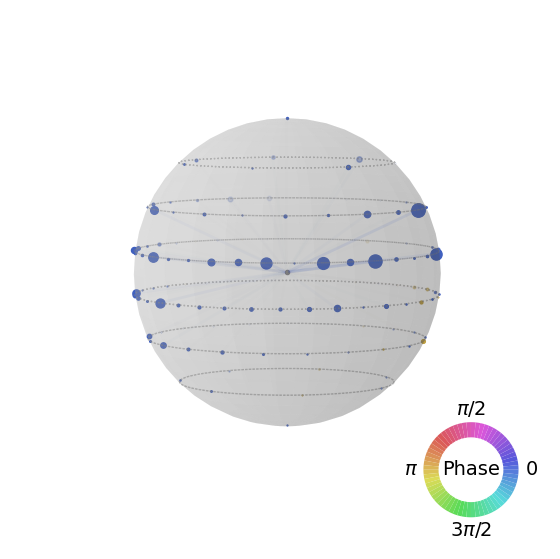

In [ ]:
state = Statevector(circ)
plot_state_qsphere(state, show_state_labels=False, show_state_phases=True)

In [ ]:
#comprobamos el inner product
#!pip install qiskit-aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend=backend)

result = job.result()
o = np.real(result.get_statevector(circ))
#print(result.get_statevector(circ))
#print(o)

m_sum = 0
for l in range(N):
    m_sum += o[l]**2 #𝑃(0)

producto_interno = 2*m_sum-1 #𝑅𝑒[⟨𝑥||𝑦⟩]=2𝑃(0)−1
print(producto_interno)

0.8934487189460063


In [ ]:
def inner_prod(vec1, vec2):
    #first check lengths are equal
    if len(vec1) != len(vec2):
        raise ValueError('Lengths of states are not equal')

    circ = QuantumCircuit(nqubits+1,1)
    vec = np.concatenate((vec1,vec2))/np.sqrt(2)

    circ.initialize(vec, range(nqubits+1))
    circ.h(nqubits)
    circ.measure(nqubits,0)

    backend = Aer.get_backend('qasm_simulator')
    job = execute(circ, backend, shots=20000)

    result = job.result()
    outputstate = result.get_counts(circ)

    if ('0' in outputstate.keys()):
        m_sum = float(outputstate["0"])/20000
    else:
        m_sum = 0

    return 2*m_sum-1

In [ ]:
def itera_por_matriz_cuantica():
  for sensor1 in sensores:
    for sensor2 in sensores:
        if sensor1 != sensor2:
          #print(sensor1)
          x = X_train[sensor1].head(64)
          y = X_train[sensor2].head(64)
          xnorm = np.linalg.norm(x)          # normalise vectors x and y
          ynorm = np.linalg.norm(y)
          x2 = x/xnorm
          y2 = y/ynorm
          correlacion_entre_variables = inner_prod(x2, y2)
          yield [sensor1, sensor2, correlacion_entre_variables]
          #print(f"Correlación entre {sensor1} y {sensor2}: {correlacion_entre_variables}")

quantum_pares = pd.DataFrame(itera_por_matriz_cuantica())
display(pares)

,0,1,2
0,Sensor_1,Sensor_2,0.672930
1,Sensor_1,Sensor_3,0.345525
2,Sensor_1,Sensor_4,-0.142864
3,Sensor_1,Sensor_5,-0.392908
4,Sensor_1,Sensor_6,-0.210788
...,...,...,...
595,Sensor_25,Sensor_20,0.430821
596,Sensor_25,Sensor_21,0.598032
597,Sensor_25,Sensor_22,0.638904
598,Sensor_25,Sensor_23,0.920509


Si queremos analizar similitud entre puntos (entre filas)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

datos = X_train

# Estandarizar los datos (es importante para PCA)
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos)

# Inicializar el objeto PCA con el número de componentes que deseas mantener
n_componentes = 2  # Por ejemplo, mantener 2 componentes principales
pca = PCA(n_components=n_componentes)

# Aplicar PCA a los datos estandarizados
componentes_principales = pca.fit_transform(datos_estandarizados)

# Crear un nuevo DataFrame con las componentes principales
nombres_componentes = [f'Componente {i+1}' for i in range(n_componentes)]
df_componentes_principales = pd.DataFrame(data=componentes_principales, columns=nombres_componentes)

# Verificar la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", varianza_explicada)

# El DataFrame 'df_componentes_principales' ahora contiene las proyecciones en el espacio de características reducido


Varianza explicada por cada componente principal: [0.23671093 0.22215732]


In [ ]:
A_train = df_componentes_principales
display(A_train)

,Componente 1,Componente 2
0,5.243481,0.476905
1,0.023658,4.334309
2,-1.804057,2.496794
3,-0.755908,0.045908
4,2.329186,-4.162234
...,...,...
103,1.529664,1.275811
104,3.754277,1.040178
105,4.784305,-2.285451
106,3.358005,1.358047


In [ ]:
display(A_train.iloc[0])
display(df_componentes_principales.iloc[0][0])

Componente 1    5.243481
Componente 2    0.476905
Name: 0, dtype: float64

5.243480753097128

In [ ]:
!pip install pennylane
import pennylane as qml
from pennylane import numpy as np
def feature_map(x, wires):

    qml.RY(x[0], wires = wires[0])
    qml.RY(x[1], wires = wires[1])

# |<x1|x2>|^2

dev = qml.device("default.qubit", wires = 5)

@qml.qnode(dev)
def swap_test(x1,x2):

    feature_map(x1, wires = [1,2])
    feature_map(x2, wires = [3,4])

    qml.Hadamard(wires = 0)
    qml.CSWAP(wires = [0,1,3])
    qml.CSWAP(wires = [0,2,4])
    qml.Hadamard(wires = 0)


    return qml.expval(qml.PauliZ(0))

def distance(x1, x2):
    return 2 - 2 * swap_test(x1,x2)

# Para ver que funciona, calcularemos la distancia entre dos puntos (dos ejemplos).

distance(A_train.iloc[0], A_train.iloc[1])

tensor(1.8176464, requires_grad=True)

In [ ]:
len(X_train['Sensor_1'].head(64))

64